<a href="https://colab.research.google.com/github/Justsecret123/One-Piece-Image-Classifier/blob/master/Model_without_Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import IPython

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

import pathlib 
import zipfile

# Files

## Dataset download

In [2]:
data_path = 'drive/My Drive/Data.zip'
zip_ref = zipfile.ZipFile(data_path,'r')
zip_ref.extractall('/tmp/')

In [3]:
data_dir = pathlib.PosixPath('/tmp/Data/')

## Images count

In [5]:
image_count = len(list(data_dir.glob("*/*")))
print(f"Files count: {image_count}")

Files count: 7834


# Display some images

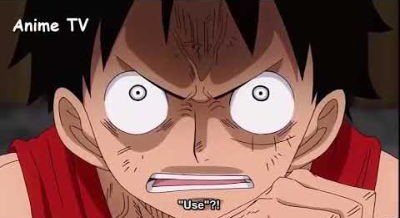

In [6]:
Luffy = list(data_dir.glob('Luffy/*'))
PIL.Image.open(str(Luffy[0]))

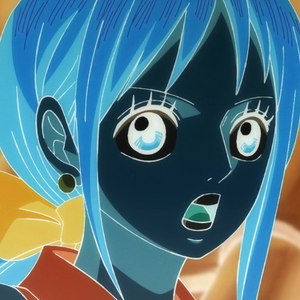

In [7]:
Nami = list(data_dir.glob('Nami/*'))
PIL.Image.open(str(Nami[0]))

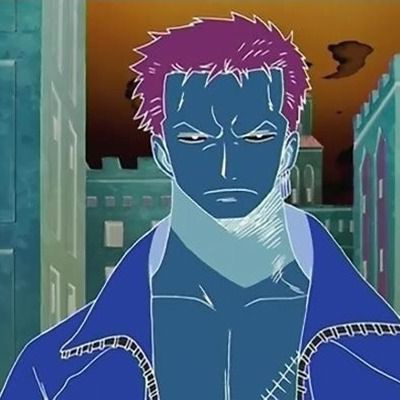

In [8]:
Zoro = list(data_dir.glob('Zoro/*'))
PIL.Image.open(str(Zoro[0]))

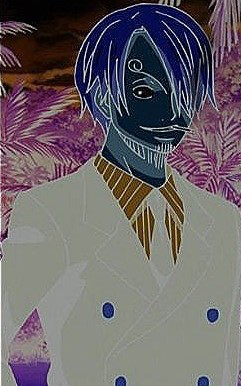

In [9]:
Sanji = list(data_dir.glob('Sanji/*'))
PIL.Image.open(str(Sanji[0]))

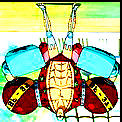

In [10]:
Franky = list(data_dir.glob('Franky/*'))
PIL.Image.open(str(Franky[0]))

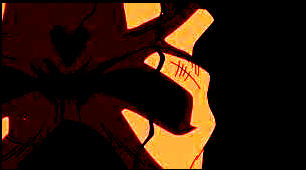

In [11]:
Brook = list(data_dir.glob('Brook/*'))
PIL.Image.open(str(Brook[0]))

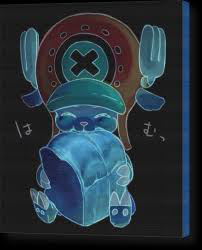

In [12]:
Chopper = list(data_dir.glob('Chopper/*'))
PIL.Image.open(str(Chopper[0]))

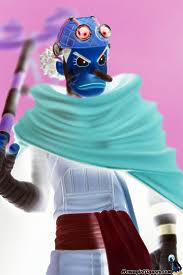

In [13]:
Usopp = list(data_dir.glob('Usopp/*'))
PIL.Image.open(str(Usopp[1]))

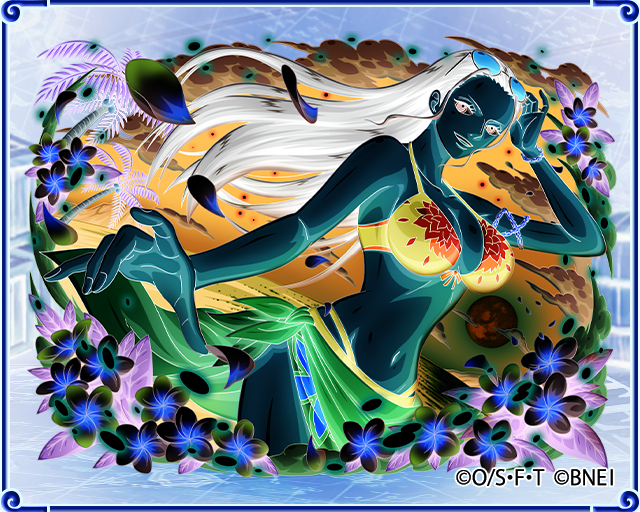

In [14]:
Robin = list(data_dir.glob('Robin/*'))
PIL.Image.open(str(Robin[0]))

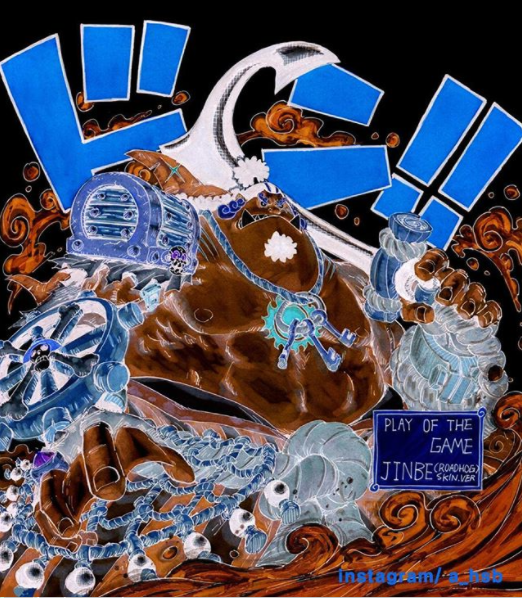

In [15]:
Jinbei = list(data_dir.glob('Jinbei/*'))
PIL.Image.open(str(Jinbei[0]))

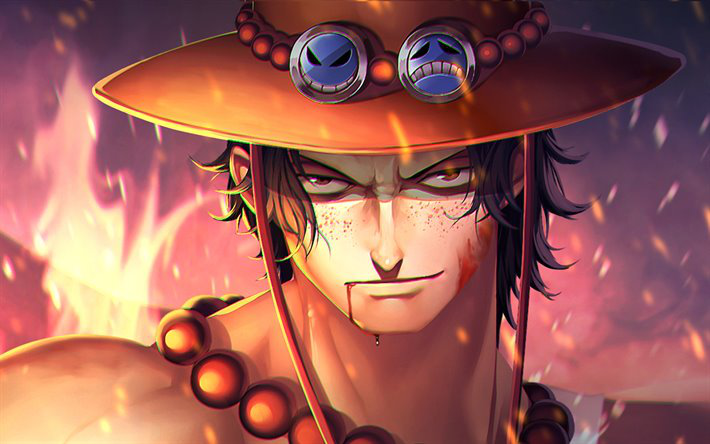

In [16]:
Ace = list(data_dir.glob('Ace/*'))
PIL.Image.open(str(Ace[0]))

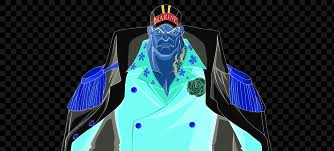

In [17]:
Akainu = list(data_dir.glob('Akainu/*'))
PIL.Image.open(str(Akainu[0]))

# Model builder

## Some parameters 

In [18]:
import random

In [19]:
random.seed(123)
seed = random.randint(0,100)

In [20]:
batch_size = 32
width = 224
height = 224

## Training dataset definition

In [21]:
train_dataset = preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(height,width),
    batch_size=batch_size
)

Found 7834 files belonging to 12 classes.
Using 6268 files for training.


In [22]:
classes_count = len(train_dataset.class_names)
class_names = train_dataset.class_names
print(class_names)

['Ace', 'Akainu', 'Brook', 'Chopper', 'Franky', 'Jinbei', 'Luffy', 'Nami', 'Robin', 'Sanji', 'Usopp', 'Zoro']


## Validation dataset definition

In [23]:
val_dataset = preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)

Found 7834 files belonging to 12 classes.
Using 1566 files for validation.


# Data augmentation

In [25]:
data_augmentation = Sequential(layers=[
                                tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(height,width,3)),
                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                tf.keras.layers.experimental.preprocessing.RandomZoom(0.1), 
                    ], name="data_augmentation")

# Model builder

## Description

* A data augmentation layer which creates "modified" images of the training set
* A MobileNet layer which detects the features
* A Global average pooling layer which converts the feature vector into a 1280 element vector
* 1*3 Dense layers followed by a dropout layer
* An activation layer (sigmoid) which represents the final output: Probability of input(X) belonging to each class
* Output classes (probabilities) : ['Brook', 'Chopper', 'Franky', 'Jinbei', 'Luffy', 'Nami', 'Robin', 'Sanji', 'Usopp', 'Zoro']





In [26]:
def model_builder():

    model = Sequential()
    base_model = tf.keras.applications.MobileNet(input_shape=(width,height,3), weights="imagenet",include_top=False)

    model.add(data_augmentation)
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())  
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(units=1024, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=1024, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=512, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(classes_count, activation='sigmoid',name='final_output'))


    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Model fit

In [27]:
model = model_builder()

17235968/17225924 [==============================] - 0s 0us/step


### Use early stopping to stop the training process if the validation accuracy stops increasing after 6 epochs, and restore the weights which minimize the validation accuracy

In [28]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=15, mode ="max", verbose=2, restore_best_weights=True)

In [29]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=150,
    verbose=1, 
    callbacks = [stop_early]
)

Epoch 1/150
196/196 [==============================] - 133s 500ms/step - loss: 1.4480 - accuracy: 0.5464 - val_loss: 3.7620 - val_accuracy: 0.3321
Epoch 2/150
196/196 [==============================] - 96s 486ms/step - loss: 0.9369 - accuracy: 0.7200 - val_loss: 3.4783 - val_accuracy: 0.4100
Epoch 3/150
196/196 [==============================] - 96s 486ms/step - loss: 0.7216 - accuracy: 0.7883 - val_loss: 2.6549 - val_accuracy: 0.5434
Epoch 4/150
196/196 [==============================] - 96s 488ms/step - loss: 0.6373 - accuracy: 0.8200 - val_loss: 0.7868 - val_accuracy: 0.7880
Epoch 5/150
196/196 [==============================] - 96s 486ms/step - loss: 0.5623 - accuracy: 0.8430 - val_loss: 0.9218 - val_accuracy: 0.7433
Epoch 6/150
196/196 [==============================] - 97s 489ms/step - loss: 0.5110 - accuracy: 0.8543 - val_loss: 0.9058 - val_accuracy: 0.7605
Epoch 7/150
196/196 [==============================] - 96s 485ms/step - loss: 0.4599 - accuracy: 0.8666 - val_loss: 1.0426 

# Plotting the training results

## MobileNet : Dropout = 0.2

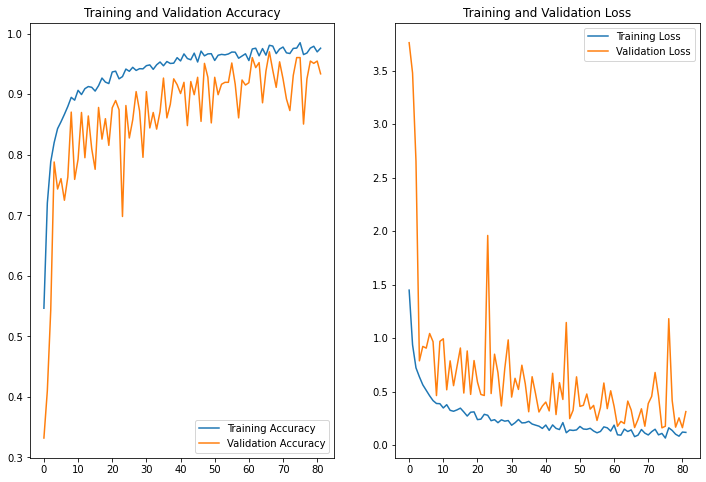

Maximum validation accuracy:  0.9699872136116028
Minimum loss: 0.16307592391967773


In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history["loss"]))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

position = np.argmax(history.history['val_accuracy'])
print(f"Maximum validation accuracy:  {history.history['val_accuracy'][position]}\nMinimum loss: {history.history['val_loss'][position]}")

# Model summary 

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_augmentation (Sequentia (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1

# Predictions

In [32]:
from google.colab import files
from keras.preprocessing import image

In [33]:
class_names = train_dataset.class_names
class_names

['Ace',
 'Akainu',
 'Brook',
 'Chopper',
 'Franky',
 'Jinbei',
 'Luffy',
 'Nami',
 'Robin',
 'Sanji',
 'Usopp',
 'Zoro']

In [34]:
def prediction(): 
  for filename in uploaded.keys():

    path = "/content/" + filename
    im = image.load_img(path,target_size=(224,224))
    
    inputs = image.img_to_array(im)

    inputs = np.vstack([inputs])

    inputs = tf.expand_dims(inputs,axis=0) #Creates a batch

    
    score = model.predict(inputs) #Make a prediction based on input values
    score = np.squeeze(score)
    print("Image: ", path)
    #for i in range (len(score)):
    #  print("\nProbability of being " + class_names[i] + \
    #         ": ", 100*score[i] , "%")

    object_score = np.max(score)  #np.argmax(score) :  returns the index with the highest score 
    object_class = class_names[np.argmax(score)]  #np.max(score) returns the highest probability of our input belonging to one of our classes
    

    plt.figure()
    plt.title("This image most likely belongs to " + str(object_class)+ \
              " category with a " + str(object_score) + " score.\n\n")
    
    plt.imshow(im)

In [35]:
uploaded = files.upload() 

Saving Ace test.jfif to Ace test.jfif
Saving Akainu test.jfif to Akainu test.jfif
Saving Brook test.jfif to Brook test.jfif
Saving Chopper test.jfif to Chopper test.jfif
Saving Franky test.jfif to Franky test.jfif
Saving Jinbei test.jpg to Jinbei test.jpg
Saving Luffy test.png to Luffy test.png
Saving Nami test.jpg to Nami test.jpg
Saving Robin test.jpg to Robin test.jpg
Saving Sanji test.jpg to Sanji test.jpg
Saving Usopp test_.jfif to Usopp test_.jfif
Saving Zoro test.jpg to Zoro test.jpg


## Prediction with some "difficult" images

Image:  /content/Ace test.jfif
Image:  /content/Akainu test.jfif
Image:  /content/Brook test.jfif
Image:  /content/Chopper test.jfif
Image:  /content/Franky test.jfif
Image:  /content/Jinbei test.jpg
Image:  /content/Luffy test.png
Image:  /content/Nami test.jpg
Image:  /content/Robin test.jpg
Image:  /content/Sanji test.jpg
Image:  /content/Usopp test_.jfif
Image:  /content/Zoro test.jpg


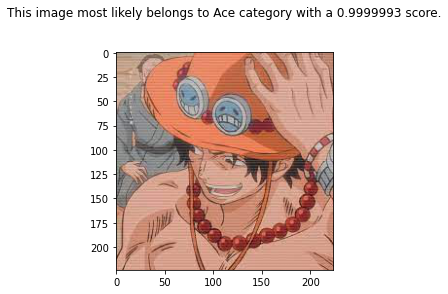

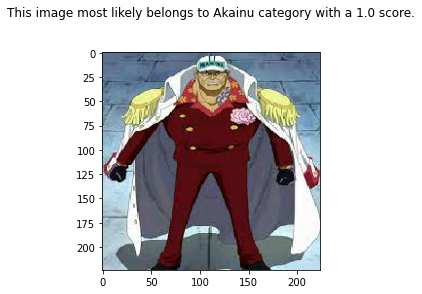

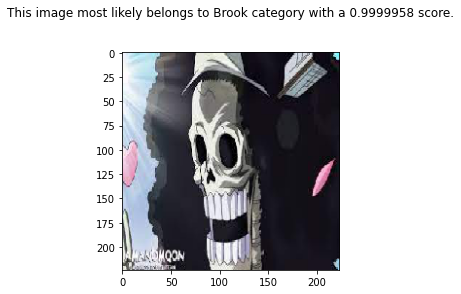

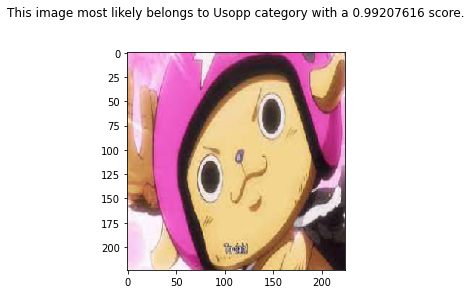

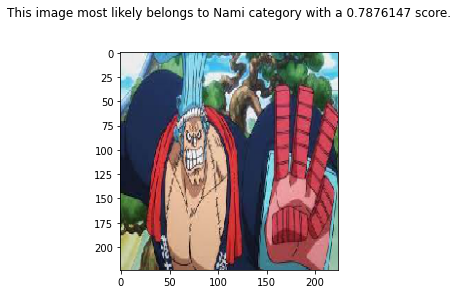

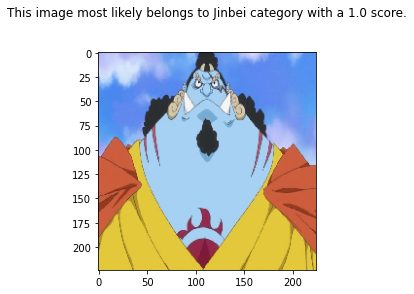

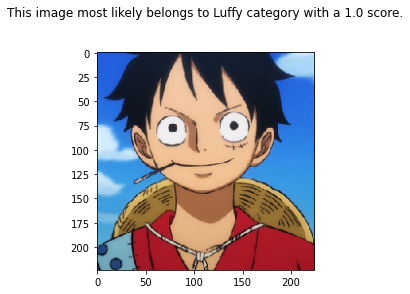

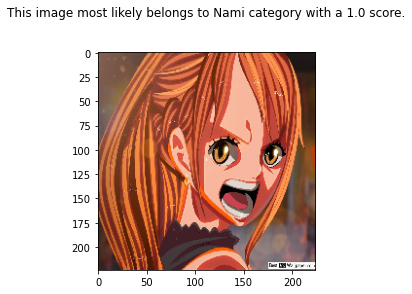

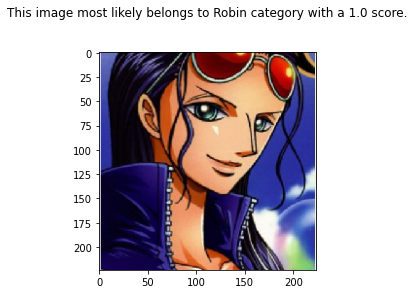

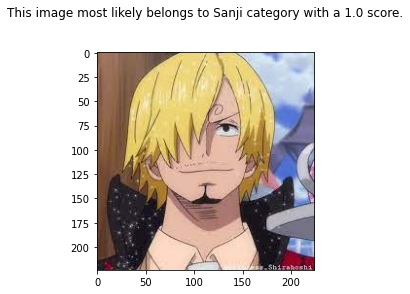

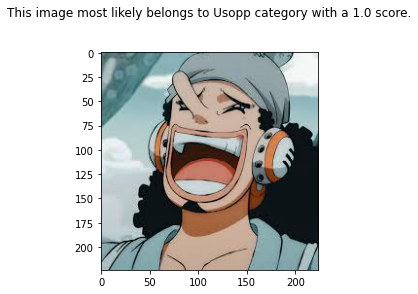

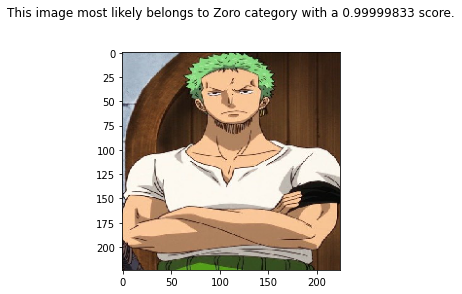

In [36]:
prediction()

# Save the model 

## Saved model format

In [37]:
model.save('drive/My Drive/One_Piece_Image_Classifier_Model_v11')

INFO:tensorflow:Assets written to: drive/My Drive/One_Piece_Image_Classifier_Model_v11/assets


## h5 format

In [ ]:
model.save('drive/My Drive/One_Piece_Image_Classifier_Model_v11.h5')

In [38]:
model.evaluate(x=val_dataset, return_dict=True)

49/49 [==============================] - 7s 125ms/step - loss: 0.1631 - accuracy: 0.9700


{'accuracy': 0.9699872136116028, 'loss': 0.16307589411735535}